## Time Series

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
sns.set(style="darkgrid")


### Loading DataSet


In [2]:
!pwd

/home/anilla/DataScience/TimeSeries


In [3]:
data=pd.read_csv('AirPassengers.csv')
data.head(5)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
date_parse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')

In [6]:
data2=pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month',date_parser=date_parse)

In [7]:
data2.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
data2.dtypes

#Passengers    int64
dtype: object

In [9]:
data2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
data2.shape

(144, 1)

In [11]:
ts=data2['#Passengers']

In [12]:
ts.shape


(144,)

In [13]:
ts.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
ts['1949-01-01']

112

In [15]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [16]:
#specify an entire range
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [17]:
ts[:'1949-03-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: #Passengers, dtype: int64

In [18]:
#note that the end index are included here unlike the numeric index

In [19]:
random=ts.sample(5)

In [20]:
random


Month
1956-10-01    306
1952-03-01    193
1949-01-01    112
1958-07-01    491
1958-12-01    337
Name: #Passengers, dtype: int64

In [21]:
random[:'1958-10-01']

Month
1956-10-01    306
1952-03-01    193
1949-01-01    112
1958-07-01    491
Name: #Passengers, dtype: int64

In [22]:
random['1949-03-01':'1958-10-01']

Month
1956-10-01    306
1952-03-01    193
1958-07-01    491
Name: #Passengers, dtype: int64

In [23]:
#in the above cell , index range doesn't work in random samples

## Analysis of Time Series

### Checking Stationarity


##### a timeseries is said to be stationary if it's statistical properties ie mean variance remai constant overtime

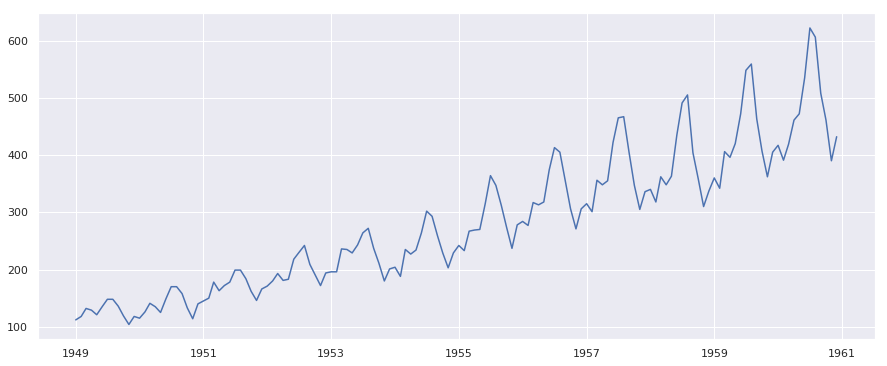

In [28]:
plt.plot(ts)

In [29]:
#it is clear in the above digram that there is an overall increase in trend and seasonlity

#### we can check stationarity by either
 1. plotting the moving average
 2. Using the dickey-fuller test 
 

In [30]:
from statsmodels.tsa.stattools import  adfuller
def test_stationarity(timeseries):
    #determine the rolling statistics
    rolling_mean=timeseries.rolling(window=12).mean()
    rolling_std=timeseries.rolling(window=12).std()
    #plot rolling statistics
    original=plt.plot(timeseries,'-b',label='original')
    mean=plt.plot(rolling_mean,'-r',label='rolling mean')
    std=plt.plot(rolling_std,'-g',label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)    #Dickey Fuller Test
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(data=dftest[0:4],index=['TestStatistics','p-value','Number of lags','Number of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical values %s'%key]=value
    print(dfoutput)


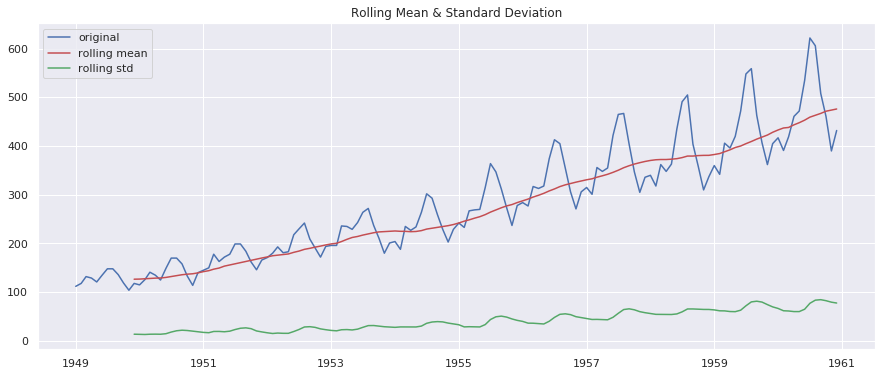

TestStatistics              0.815369
p-value                     0.991880
Number of lags             13.000000
Number of observations    130.000000
Critical values 1%         -3.481682
Critical values 5%         -2.884042
Critical values 10%        -2.578770
dtype: float64


In [31]:
test_stationarity(ts)

In [32]:
#from the above results, the ts is non stationary as the test statistics is more than the critical vlues hence we fail to reject the null hypothesu,that is its is a non staionary 

## Making time series to be stationary

1. To make a non stationary time series stationary,we remove the trend and seasonlity since they rate the reason for  aseries to be non stationary

### Estimation and Eliminating Trend

It can be done by transformation ie log ,cube root,square root

In [33]:
ts_log=np.log(ts)

In [34]:
ts_log.head(6)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
Name: #Passengers, dtype: float64

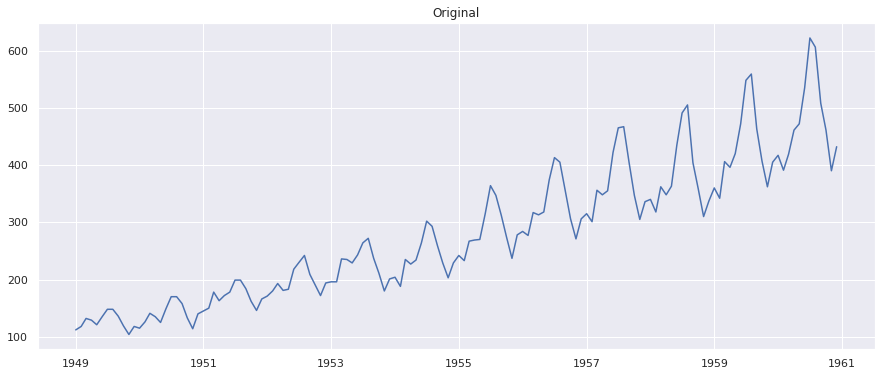

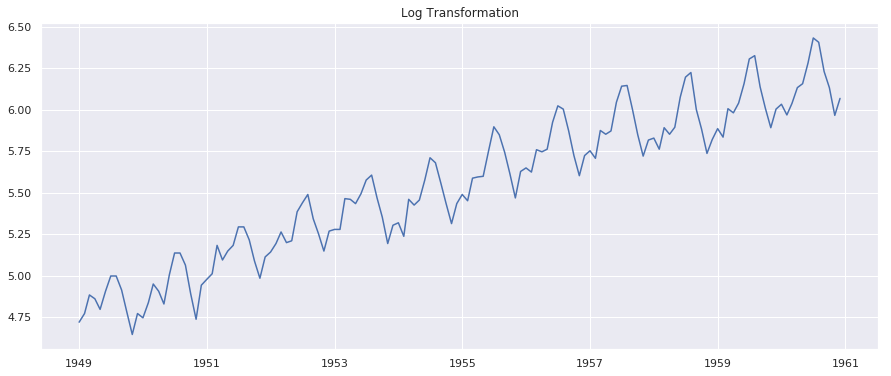

In [35]:

plt.plot(ts)
plt.title('Original')
plt.show()
plt.plot(ts_log)
plt.title('Log Transformation')
plt.show()

## Moving average

In [36]:
mv_avg=ts_log.rolling(window=12).mean()

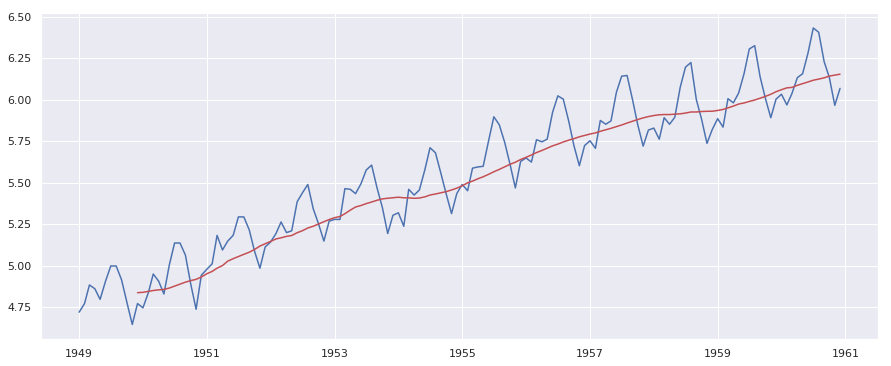

In [37]:
plt.plot(ts_log)
plt.plot(mv_avg,'-r')

In [38]:
ts_log_mv_avg_diff=ts_log-mv_avg

In [39]:
ts_log_mv_avg_diff.head(24)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
Name: #Passengers, dtype: float64

In [40]:
#drop the first NAN and check the stationarity

In [41]:
ts_log_mv_avg_diff.dropna(inplace=True)

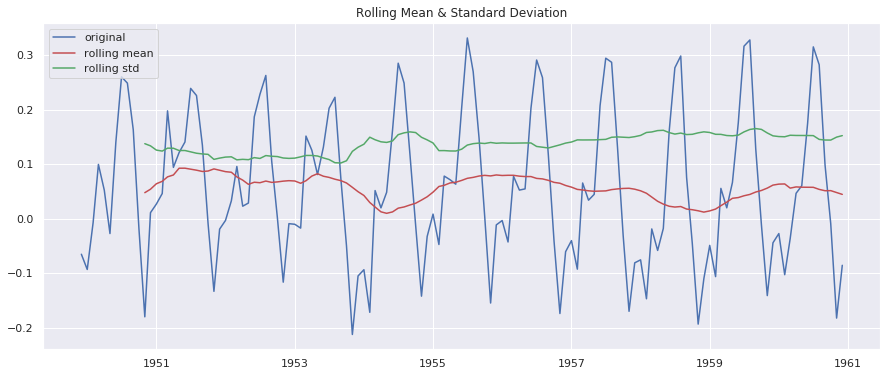

TestStatistics             -3.162908
p-value                     0.022235
Number of lags             13.000000
Number of observations    119.000000
Critical values 1%         -3.486535
Critical values 5%         -2.886151
Critical values 10%        -2.579896
dtype: float64


In [42]:
test_stationarity(ts_log_mv_avg_diff)

In [43]:
#since the testatistics is less that the critical value hence we reject the null hypotheis ;therefore, we have 95% confidence that the series is stationary


In [44]:
exp_weightedavg=pd.DataFrame.ewm(ts_log,halflife=12).mean()

In [45]:
exp_weightedavg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
1949-06-01    4.826807
1949-07-01    4.855564
1949-08-01    4.877049
1949-09-01    4.881978
1949-10-01    4.868821
1949-11-01    4.842036
1949-12-01    4.834027
1950-01-01    4.824557
1950-02-01    4.825744
1950-03-01    4.837657
1950-04-01    4.843949
1950-05-01    4.842546
1950-06-01    4.856559
1950-07-01    4.880081
1950-08-01    4.901033
1950-09-01    4.913937
1950-10-01    4.912097
1950-11-01    4.898667
1950-12-01    4.901883
1951-01-01    4.907382
1951-02-01    4.914838
1951-03-01    4.933808
1951-04-01    4.945007
1951-05-01    4.958991
1951-06-01    4.974181
                ...   
1958-07-01    5.832405
1958-08-01    5.854442
1958-09-01    5.862700
1958-10-01    5.863859
1958-11-01    5.856708
1958-12-01    5.854650
1959-01-01    5.856417
1959-02-01    5.855203
1959-03-01    5.863694
1959-04-01    5.870306
1959-05-01    5.879851
1959-06-01    5.895416
1959-

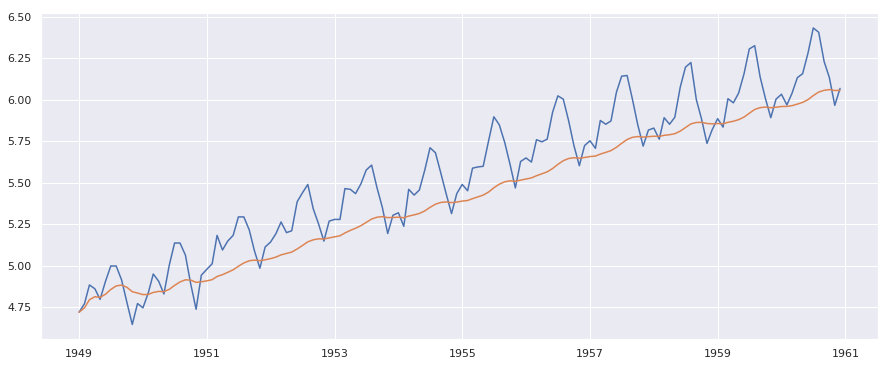

In [46]:
plt.plot(ts_log)
plt.plot(exp_weightedavg)

In [47]:
ts_log_wma_diff=ts_log-exp_weightedavg


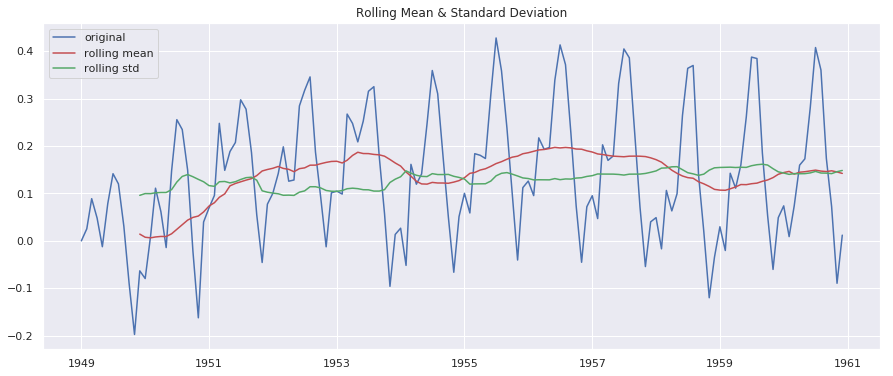

TestStatistics             -3.601262
p-value                     0.005737
Number of lags             13.000000
Number of observations    130.000000
Critical values 1%         -3.481682
Critical values 5%         -2.884042
Critical values 10%        -2.578770
dtype: float64


In [48]:
test_stationarity(ts_log_wma_diff)

## 1. Eliminating trend and seasonality

This can be done by:

1. Decomposition
2. Diffferencing 

### 1.Differencing
Here,we take the difference of  a particular instant with that of a previous instant.Below is a simple example

In [49]:
a=pd.DataFrame({'A':[10, 20, 15, 30, 45],'B':[13, 23, 18, 33, 48],'C':[17, 27, 22, 37, 52]})

In [50]:
a

,A,B,C
0,10,13,17
1,20,23,27
2,15,18,22
3,30,33,37
4,45,48,52


In [52]:
a.shift(periods=3)

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,10.0,13.0,17.0
4,20.0,23.0,27.0


In [53]:
ts_log_shift=ts_log.shift()

In [54]:
ts_log_shift

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
1949-06-01    4.795791
1949-07-01    4.905275
1949-08-01    4.997212
1949-09-01    4.997212
1949-10-01    4.912655
1949-11-01    4.779123
1949-12-01    4.644391
1950-01-01    4.770685
1950-02-01    4.744932
1950-03-01    4.836282
1950-04-01    4.948760
1950-05-01    4.905275
1950-06-01    4.828314
1950-07-01    5.003946
1950-08-01    5.135798
1950-09-01    5.135798
1950-10-01    5.062595
1950-11-01    4.890349
1950-12-01    4.736198
1951-01-01    4.941642
1951-02-01    4.976734
1951-03-01    5.010635
1951-04-01    5.181784
1951-05-01    5.093750
1951-06-01    5.147494
                ...   
1958-07-01    6.075346
1958-08-01    6.196444
1958-09-01    6.224558
1958-10-01    6.001415
1958-11-01    5.883322
1958-12-01    5.736572
1959-01-01    5.820083
1959-02-01    5.886104
1959-03-01    5.834811
1959-04-01    6.006353
1959-05-01    5.981414
1959-06-01    6.040255
1959-

In [55]:
ts_log_diff=ts_log-ts_log_shift

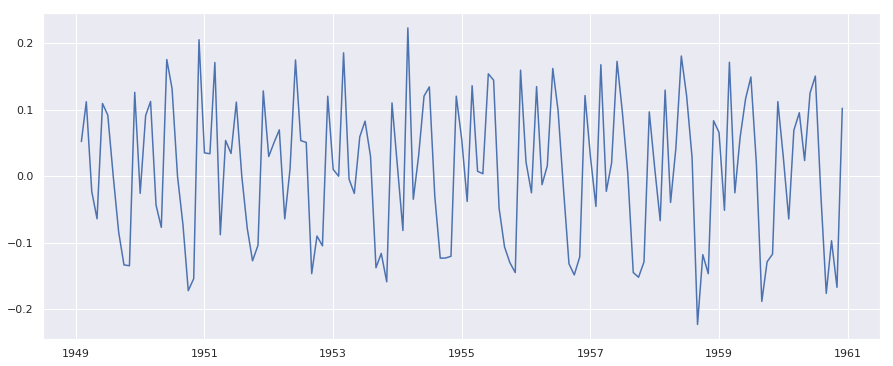

In [56]:
plt.plot(ts_log_diff)

In [57]:
ts_log_diff.dropna(inplace=True)

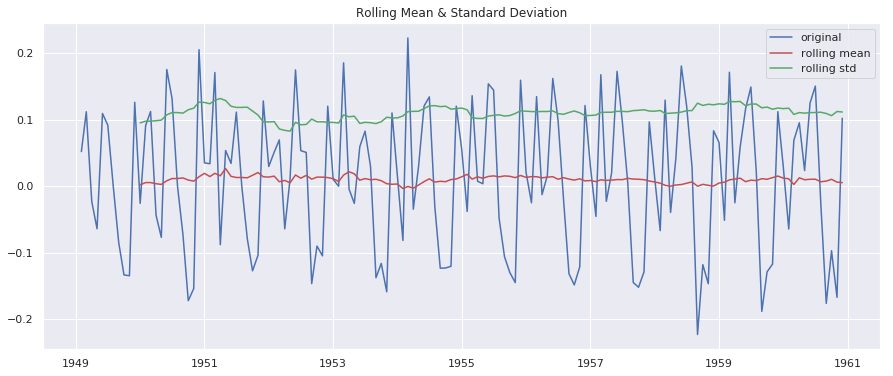

TestStatistics             -2.717131
p-value                     0.071121
Number of lags             14.000000
Number of observations    128.000000
Critical values 1%         -3.482501
Critical values 5%         -2.884398
Critical values 10%        -2.578960
dtype: float64


In [58]:
test_stationarity(ts_log_diff)

In [61]:
#2nd Order

In [59]:
ts_log_shift2=ts_log.shift(periods=2)

In [62]:
ts_log_diff2=ts_log-ts_log_shift2

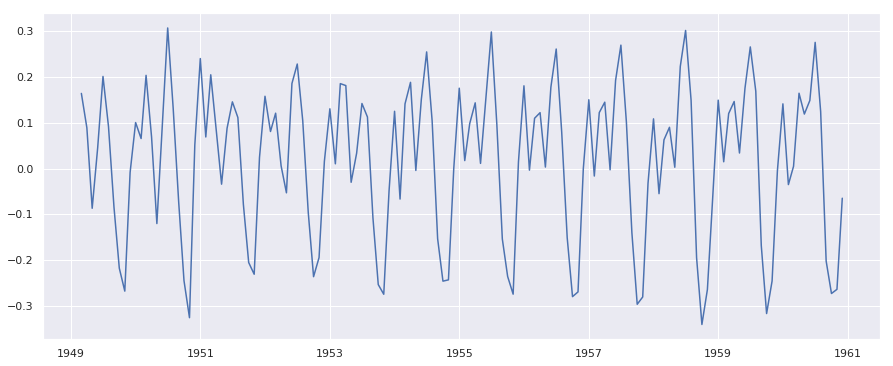

In [63]:
plt.plot(ts_log_diff2)

In [64]:
ts_log_diff2.dropna(inplace=True)

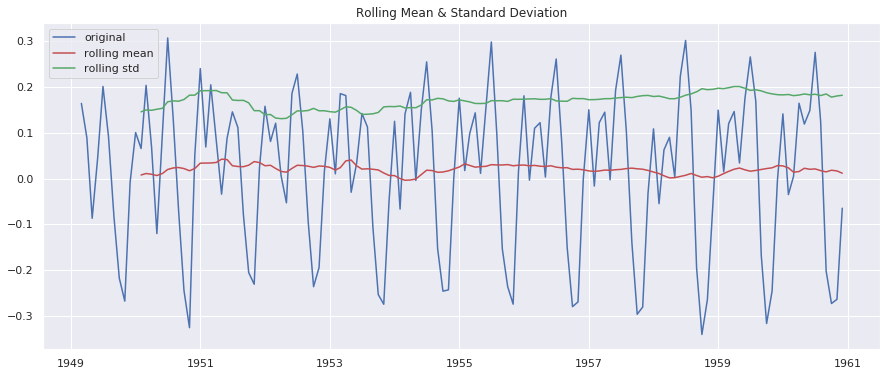

TestStatistics             -3.167907
p-value                     0.021919
Number of lags             11.000000
Number of observations    130.000000
Critical values 1%         -3.481682
Critical values 5%         -2.884042
Critical values 10%        -2.578770
dtype: float64


In [65]:
test_stationarity(ts_log_diff2)

In [66]:
#It gets better when the periods of differencing increase

## 2. Decomposing

Herer the trend and seasonality are modelled differently and the remaining part of the series returned

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
decomposition=seasonal_decompose(ts_log)

In [69]:
decomposition

In [70]:
trend=decomposition.trend

In [71]:
seasonal=decomposition.seasonal

In [72]:
error=decomposition.resid

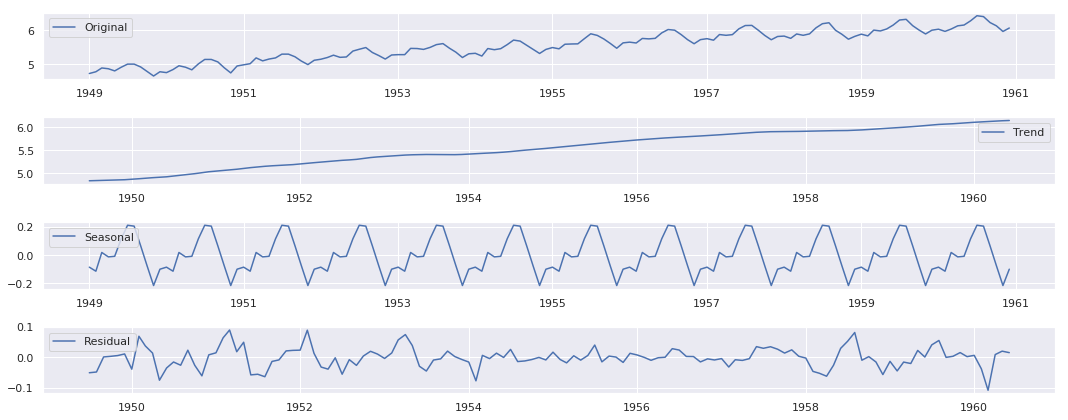

In [73]:
plt.subplot(4,1,1)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(error,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

In [74]:
#Checking Stationarity of the residuals

In [75]:
ts_residual_decompose=error

In [76]:
ts_residual_decompose.dropna(inplace=True)

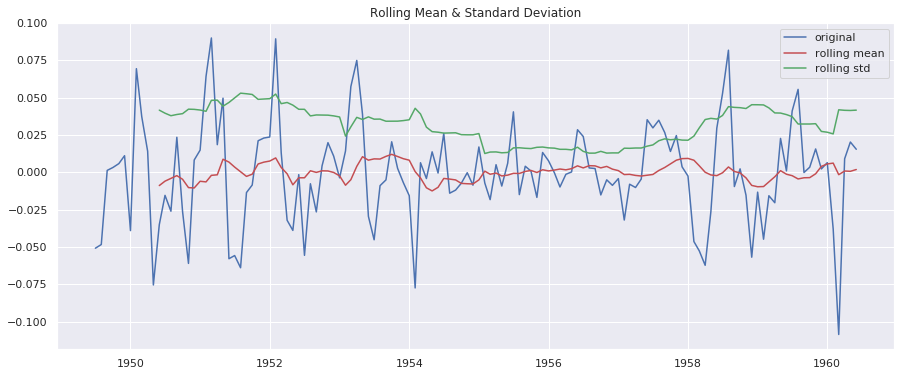

TestStatistics           -6.332387e+00
p-value                   2.885059e-08
Number of lags            9.000000e+00
Number of observations    1.220000e+02
Critical values 1%       -3.485122e+00
Critical values 5%       -2.885538e+00
Critical values 10%      -2.579569e+00
dtype: float64


In [77]:
test_stationarity(ts_residual_decompose)

As per the above dickey fuller test statistic, the teststatistics is lower than the 1% critical value .Hence we ject the null hypothesis and conclude that the residual is stationary

## Forecasting Time Series

Having Performed the trend seasonality estimation techniques ,there can be two techniques:
1. A Strictly Stationary Series with no dependance among the values,its an easy case but very rare
2. Weakly stationary series with a significant dependance among values thus in this case    we use ARIMA to forecast the data.


### ARIMA

ARIMA stands for Auto Regressive Intergrated Moving Averages.

- The ARIMA forecasting for a stationary time series is nothing but linear equation.The    predictors depend on parameters(p,d,q) of the ARIMA model: 
1. Number of AR terms(p)-AR are just lags of dependant variable ie if p is 5 the predictors for X(t) will be from X(t-1)....X(t-5).
2. Number of MA  terms(q) MA terms are  lagged forecast errors in prediction  equation X(t) will be e(t-1).....e(t-5)
3. Number of Differences(d)-These are the number of nonseasonal differences ie in the case we took the first order difference.SO either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of p and q . We use two plots to determine these numbers .

- AutoCorrelation Function(ACF):measure of correlation between the Ts with its lagged version of itself.For Instance at lag 5 ,ACF would compare series at time instant 't1'...'t2' with series 
- Partial Autocorrelation Function (PACF):This measures the correlation between TS with a lagged version of itself but after elimating the variations alreday explained by the intervening comparisons.For example at  lag 5 ,it will check the correlation but remove the effects already explained by lags 1 to 4.

In [78]:
#ACF and PACF:
from statsmodels.tsa.stattools import acf,pacf

In [79]:
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')

Text(0.5,1,'Autocorrelation Function')

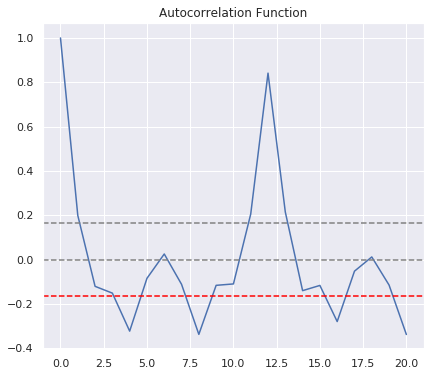

In [83]:
#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

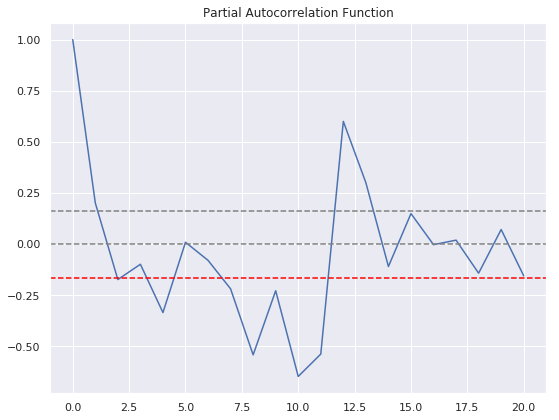

In [84]:
#Plot PACF
plt.subplot(121)#nrows,ncols,index in that order
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In the above plots,the dotted lines on either sides of the  0 are the confidence intervals and can be used to determine the 'p','q'.
1. p-the lag value where the **PACF** chart crosses the upper confidence interval for the first time ;here it's p=2
2. q-the lag value where **ACF** chart crosses the upper confidence interval for the first time; here it's q=2

### ARIMA 

In [85]:
from statsmodels.tsa.arima_model import ARIMA

/home/anilla/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anilla/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS:1.5023')

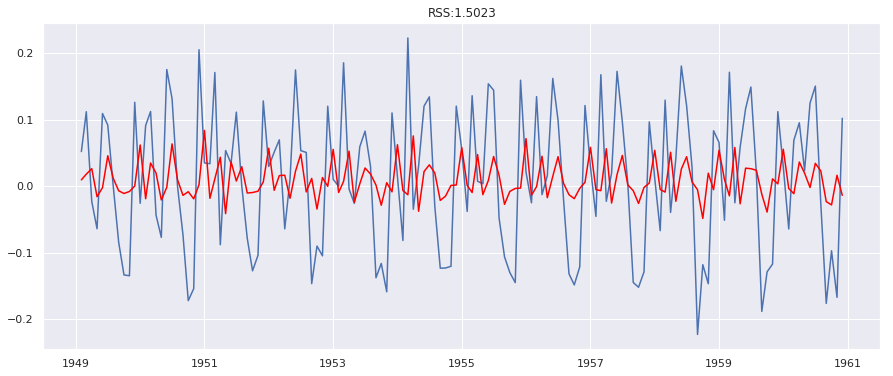

In [87]:
model=ARIMA(ts_log,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

/home/anilla/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anilla/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS:1.4721')

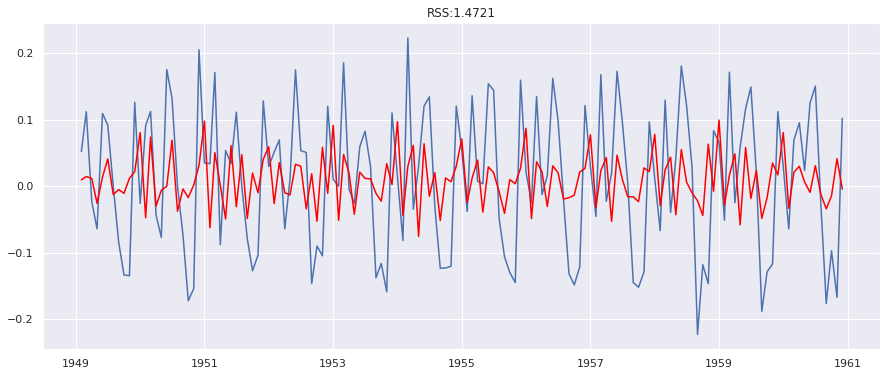

In [88]:
model=ARIMA(ts_log,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

/home/anilla/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anilla/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.0292')

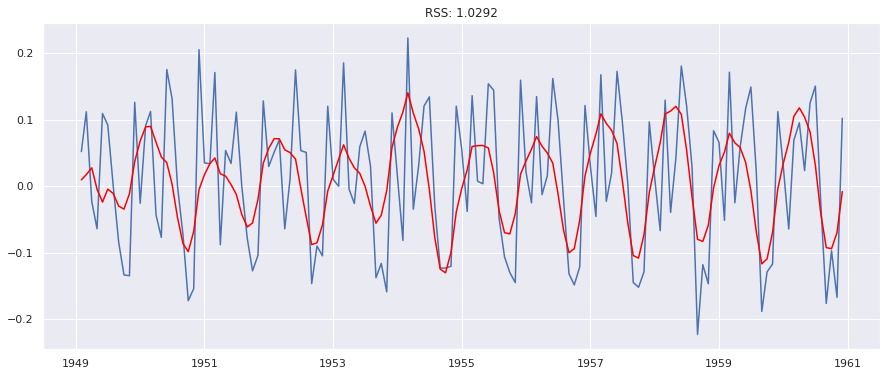

In [89]:
model=ARIMA(ts_log,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

## Taking back to original scale

In [90]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head(5)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [91]:
#Getting the cumulative sum of the values

In [92]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()

In [97]:
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [107]:
predictions_ARIMA_log=pd.Series(ts_log.iloc[:])

In [109]:
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

In [114]:
predictions2_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [115]:
predictions2_ARIMA_log.head(5)

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

Text(0.5,1,'RMSE:510.119399')

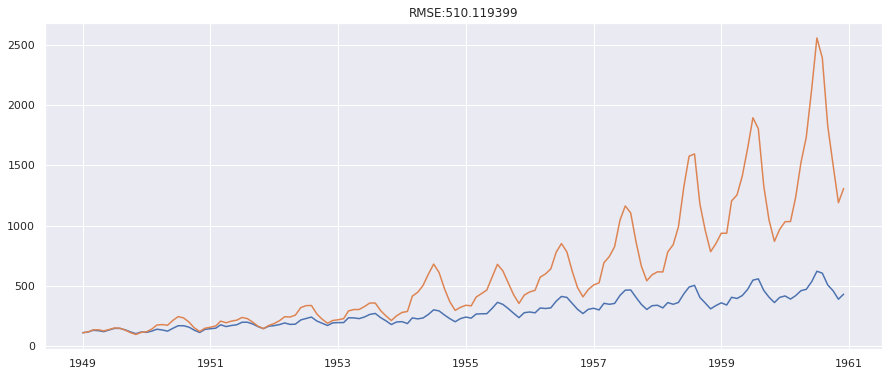

In [116]:
predictions2_ARIMA_exp=np.exp(predictions2_ARIMA_log)
plt.plot(ts)
plt.plot(predictions2_ARIMA_exp)
plt.title('RMSE:%4f'% np.sqrt(sum((predictions2_ARIMA_exp-ts)**2)/len(ts)))